# NYC Taxi Trip Duration Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time
from datetime import datetime
from geopy.distance import geodesic
from IPython.display import clear_output

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zone = pd.read_csv('/content/drive/MyDrive/NYC Taxi Duration Trip Project/nyc_taxi_trip_duration_with_zone.csv',delimiter=';')

**Data Fields**
* id - a unique identifier for each trip _(pengenal unik untuk setiap perjalanan)_
* vendor_id - a code indicating the provider associated with the trip record _(kode yang menunjukkan penyedia yang terkait dengan catatan perjalanan)_
* pickup_datetime - date and time when the meter was engaged _(tanggal dan waktu ketika meteran diaktifkan)_
* dropoff_datetime - date and time when the meter was disengaged _(tanggal dan waktu ketika meteran dilepaskan)_
* passenger_count - the number of passengers in the vehicle (driver entered value) _(jumlah penumpang di dalam kendaraan (nilai yang dimasukkan pengemudi))_
* pickup_longitude - the longitude where the meter was engaged _(garis bujur tempat meteran diaktifkan)_
* pickup_latitude - the latitude where the meter was engaged _(garis lintang tempat meteran diaktifkan)_
* dropoff_longitude - the longitude where the meter was disengaged _(garis bujur tempat meteran dilepaskan)_
* dropoff_latitude - the latitude where the meter was disengaged _(garis lintang tempat meteran dilepaskan)_
* store_and_fwd_flag - This flag indicates whether the trip record was held in the vehicle's memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
_(Bendera ini menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor karena kendaraan tidak memiliki koneksi ke server - Y = simpan dan teruskan; N = bukan perjalanan simpan dan teruskan)_
* trip_duration - duration of the trip in seconds _(duration of the trip in seconds)_


In [ ]:
#df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [ ]:
zone.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,help1,help2,help3,help4,id_puzone,pickup_zone,id_dozone,dropoff_zone
0,id1080784,2,29/02/2016 16:40,29/02/2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400,-73.95,40.77,-73.96,40.77,59,Crotona Park,59,Crotona Park
1,id0889885,1,11/03/2016 23:35,11/03/2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,-73.98,40.73,-73.99,40.69,59,Crotona Park,59,Crotona Park
2,id0857912,2,21/02/2016 17:59,21/02/2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,-73.99,40.72,-73.94,40.77,59,Crotona Park,59,Crotona Park
3,id3744273,2,05/01/2016 09:44,05/01/2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,-73.96,40.75,-73.95,40.78,59,Crotona Park,59,Crotona Park
4,id0232939,1,17/02/2016 06:42,17/02/2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848,-74.01,40.70,-73.98,40.74,59,Crotona Park,59,Crotona Park


In [ ]:
zone.drop(columns=['help1', 'help2', 'help3', 'help4'], inplace=True)

## Basic Exploration

In [ ]:
zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
 11  id_puzone           729322 non-null  int64  
 12  pickup_zone         729322 non-null  object 
 13  id_dozone           729322 non-null  int64  
 14  dropoff_zone        729322 non-null  object 
dtypes: float64(4), int64(5), object(6)

In [ ]:
zone.duplicated().sum()

0

In [ ]:
zone.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
id_puzone             0
pickup_zone           0
id_dozone             0
dropoff_zone          0
dtype: int64

- Tidak ada data duplikat
- Tidak ada missing value

In [ ]:
zone.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,id_puzone,id_dozone
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,62.973946,61.965106
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,30.153642,31.042979
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,4.000000,4.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,59.000000,59.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,59.000000,59.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,59.000000,59.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,254.000000,254.000000


* Rata-rata penumpang dalam setiap perjalanan adalah 1,66. Tapi, ada yang jumlah penumpangnya 0 dan 9, perlu ditelusiri
* Rata-rata durasi perjalanan adalah 952 detik
* Terdapat outlier pada kolo trip_duration dengan nilai yang ekstrem.

In [ ]:
zone['passenger_count'].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

Pada umumnya jumlah penumpang yang diperbolehkan adalah 4 untuk jenis taxi kuning, jika lebih biasanya 1 penumpang lainnya adalah anak-anak di bawah 7 tahun, dan duduk dipangku oleh penumpang dewasa lainnya.

## Bivariate Analysis

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

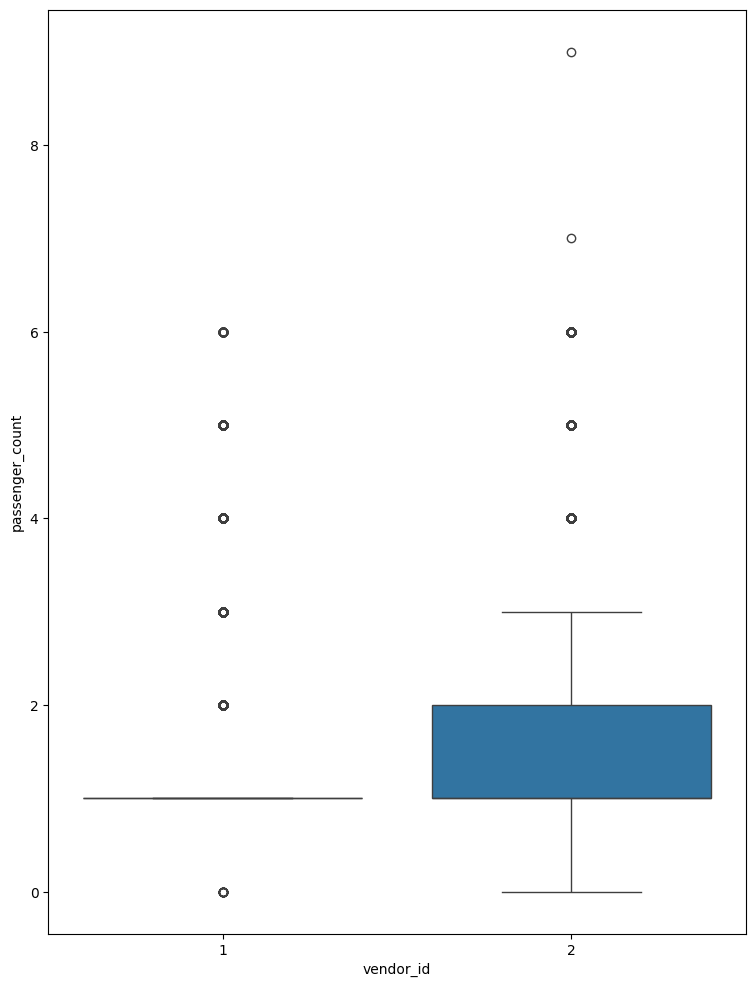

In [ ]:
plt.figure(figsize=(9,12))
sns.boxplot(data=zone, x='vendor_id', y='passenger_count')

## Multicolinearity check

<Axes: >

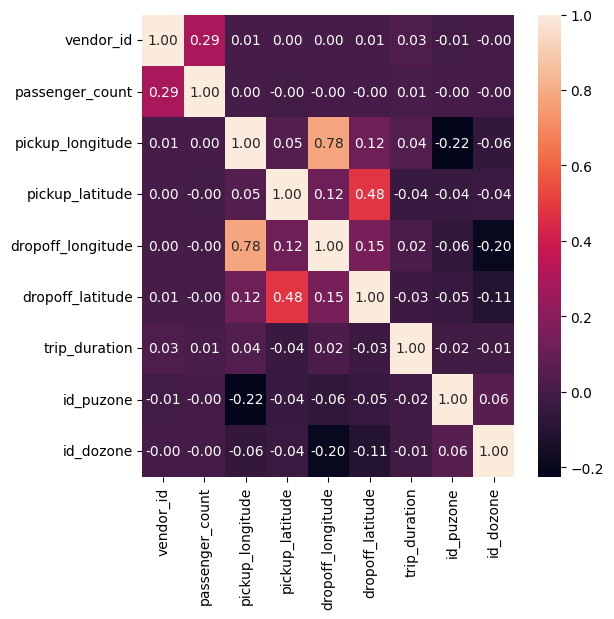

In [ ]:
corr_ = zone[zone.describe().columns].corr()
plt.figure(figsize=(6,6))
sns.heatmap(data=corr_, annot=True, fmt='.2f')

# Deep Dive EDA

- Analisa durasi perjalanan berdasarkan waktunya.
* Pertumbuhan penggunaan taxi pertahun?
* Analisa jumlah penumpang per bulan, minggu dan hari
* Jam-jam sibuk

- Analisa berdasarkan rute perjalanan.
* Pick up point paling banyak
* Drop point paling banyak
* Rute terpendek dan terjauh
* Rata-rata jarak tempuh penumpang dalam sepekan, sehari

In [5]:
distance = []
for index in zone['pickup_latitude'].index:
  distance.append(geodesic((zone['pickup_latitude'].iloc[index], zone['pickup_longitude'].iloc[index]), (zone['dropoff_latitude'].iloc[index], zone['dropoff_longitude'].iloc[index])).km)
zone['distance_km'] = distance

In [6]:
zone['speed'] = zone['distance_km']/(zone['trip_duration']/3600)

In [7]:
zone['distance_km'] = zone['distance_km'].round(2)
zone['speed'] = zone['speed'].round(2)

In [ ]:
zone.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,id_puzone,pickup_zone,id_dozone,dropoff_zone,distance_km,speed
0,id1080784,2,29/02/2016 16:40,29/02/2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400,59,Crotona Park,59,Crotona Park,1.20,10.80
1,id0889885,1,11/03/2016 23:35,11/03/2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,59,Crotona Park,59,Crotona Park,4.12,13.50
2,id0857912,2,21/02/2016 17:59,21/02/2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,59,Crotona Park,59,Crotona Park,7.25,15.96
3,id3744273,2,05/01/2016 09:44,05/01/2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,59,Crotona Park,59,Crotona Park,2.36,7.44
4,id0232939,1,17/02/2016 06:42,17/02/2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848,59,Crotona Park,59,Crotona Park,4.33,18.37


In [8]:
zone['pickup_datetime'] = pd.to_datetime(zone['pickup_datetime'])

zone['pickup_date'] = zone.pickup_datetime.dt.day
zone['pickup_month'] = zone.pickup_datetime.dt.month
zone['pickup_year'] = zone.pickup_datetime.dt.year

<ipython-input-8-28458c5b23fb>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  zone['pickup_datetime'] = pd.to_datetime(zone['pickup_datetime'])


In [9]:
zone['pickup_hour'] = zone.pickup_datetime.dt.hour

In [ ]:
print(zone.pickup_year.unique())
print(zone.pickup_month.unique())

[2016]
[2 3 1 4 6 5]


## Vendor Analysis

<Axes: xlabel='vendor_id', ylabel='count'>

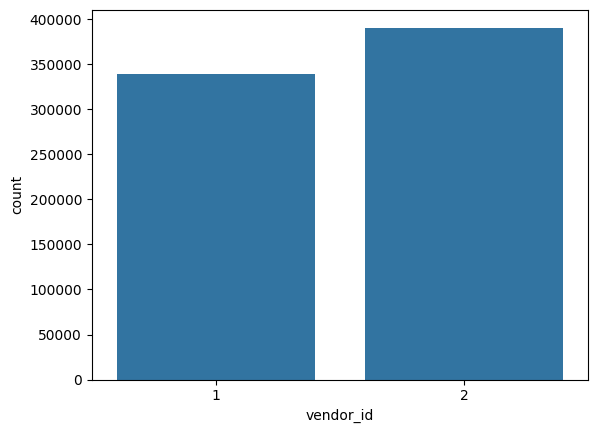

In [ ]:
sns.countplot(data=zone, x='vendor_id')

In [ ]:
zone.groupby(['vendor_id']).agg(passenger_mean=('passenger_count', 'mean')).reset_index()

,vendor_id,passenger_mean
0,1,1.258455
1,2,2.012280


In [ ]:
print(f"Durasi perjalanan tercepat adalah {zone.trip_duration.min()} detik")
print(f"Durasi perjalanan terlama adalah {zone.trip_duration.max()} detik")
print(f"Rata-rata catatan waktu perjalanan adalah {zone.trip_duration.mean()}")

Durasi perjalanan tercepat adalah 1 detik
Durasi perjalanan terlama adalah 1939736 detik
Rata-rata catatan waktu perjalanan adalah 952.2291333594764


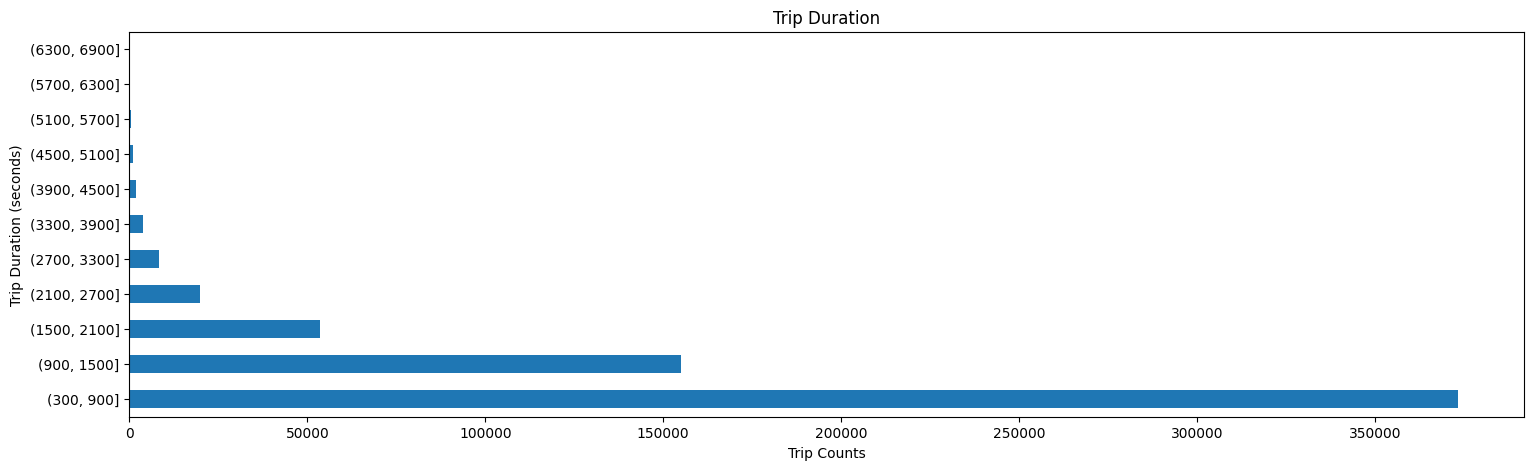

In [ ]:
zone.trip_duration.groupby(pd.cut(zone.trip_duration, np.arange(300,7200,600))).count().plot(kind='barh',figsize = (18,5))
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

Observasi lebih spesifik dari rentan 300 detik (5 menit) sampai 3000 detik (50 menit)

In [ ]:
zone[(zone['trip_duration'] >= 300) & (zone['trip_duration'] <= 3000)].groupby(['vendor_id']).agg(Mean_trip = ('trip_duration', 'mean')).reset_index()

,vendor_id,Mean_trip
0,1,896.181147
1,2,901.494042


In [ ]:
zone[zone['vendor_id'] == 1].describe(include=['O'])

,id,dropoff_datetime,store_and_fwd_flag,pickup_zone,dropoff_zone
count,338841,338841,338841,338841,338841
unique,338841,176318,2,37,55
top,id0889885,29/06/2016 18:48,N,Crotona Park,Crotona Park
freq,1,11,334801,292035,289395


In [ ]:
zone[zone['vendor_id'] == 2].describe(include=['O'])

,id,dropoff_datetime,store_and_fwd_flag,pickup_zone,dropoff_zone
count,390481,390481,390481,390481,390481
unique,390481,185536,1,37,57
top,id1080784,08/06/2016 21:39,N,Crotona Park,Crotona Park
freq,1,11,390481,335457,333220


In [ ]:
trip_month = zone[(zone['vendor_id'] == 1)].groupby(['pickup_month']).agg(Mean_trip = ('trip_duration', 'mean')).reset_index()

In [ ]:
trip2_month = zone[(zone['vendor_id'] == 2)].groupby(['pickup_month']).agg(Mean_trip = ('trip_duration', 'mean')).reset_index()

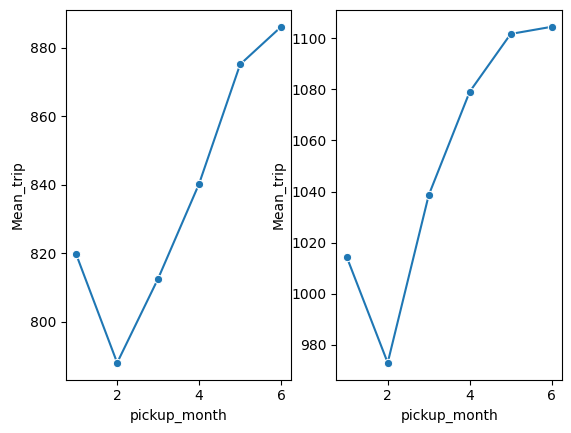

In [ ]:
fig, axes = plt.subplots(1, 2)
sns.lineplot(data=trip_month, x='pickup_month', y='Mean_trip', marker='o', ax=axes[0])
sns.lineplot(data=trip2_month, x='pickup_month', y='Mean_trip', marker='o', ax=axes[1])
plt.show()

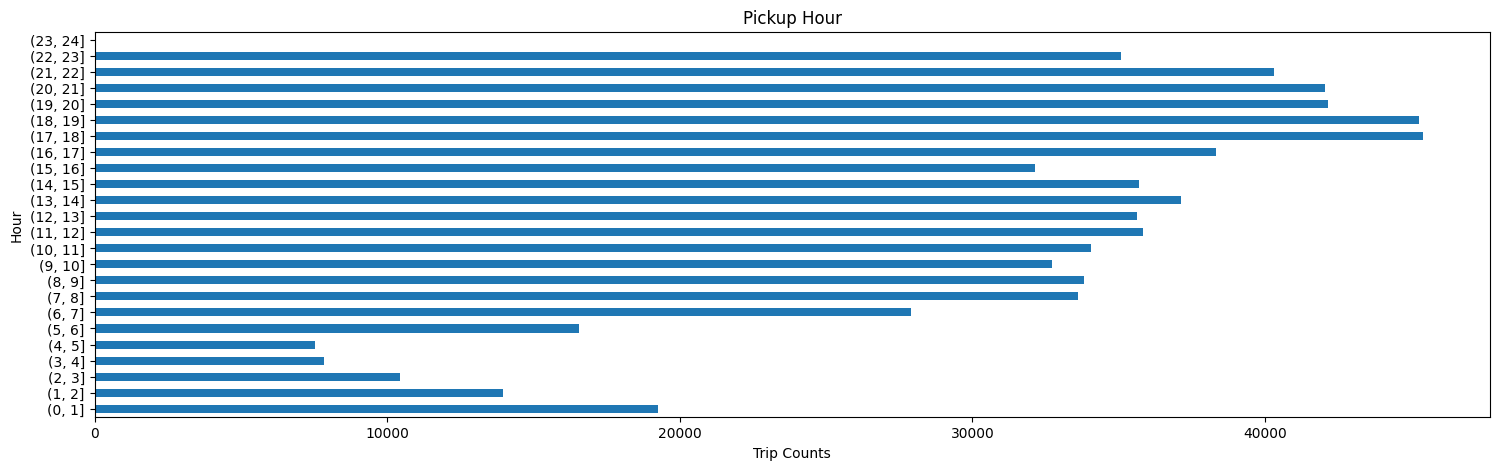

In [ ]:
zone.pickup_hour.groupby(pd.cut(zone.pickup_hour, np.arange(0,25,1))).count().plot(kind='barh',figsize = (18,5))
plt.title('Pickup Hour')
plt.xlabel('Trip Counts')
plt.ylabel('Hour')
plt.show()

<Axes: xlabel='vendor_id', ylabel='distance_km'>

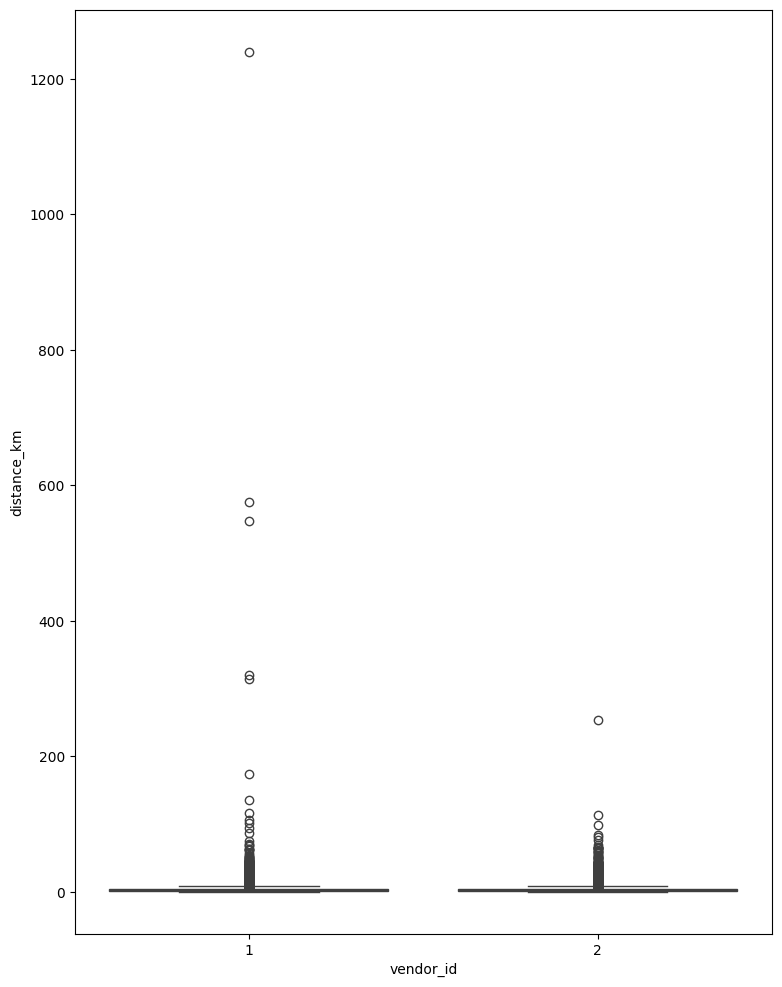

In [ ]:
plt.figure(figsize=(9,12))
sns.boxplot(data=zone, x='vendor_id', y='distance_km')

In [ ]:
zone.groupby(['vendor_id']).agg(avg_km=('distance_km', 'mean')).reset_index()

,vendor_id,avg_km
0,1,3.411979
1,2,3.468915


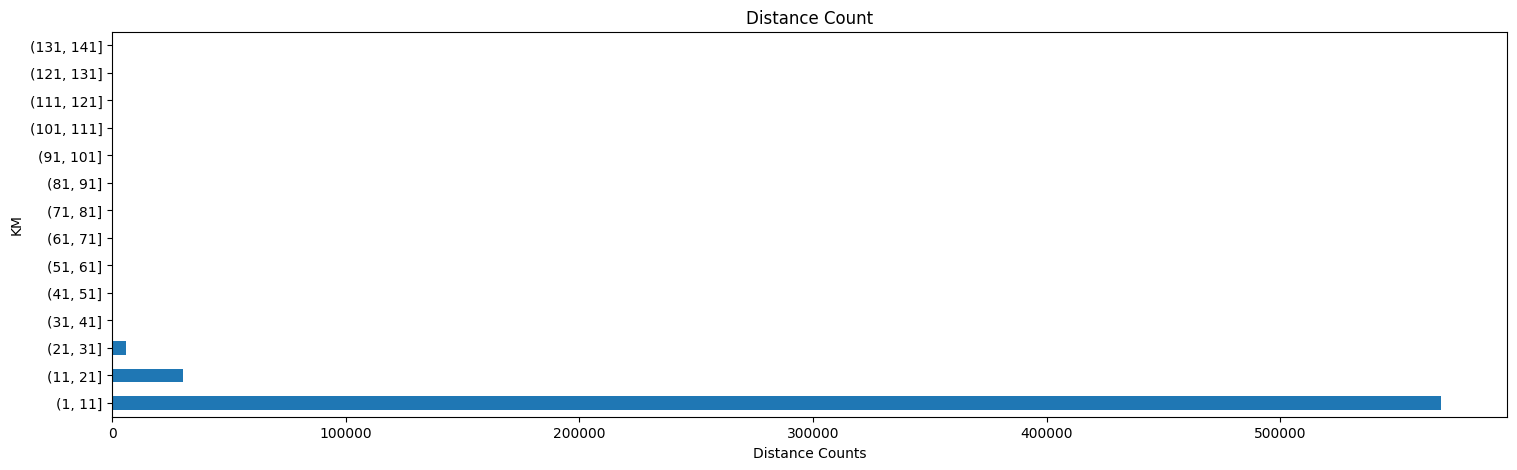

In [ ]:
zone.distance_km.groupby(pd.cut(zone.distance_km, np.arange(1,151,10))).count().plot(kind='barh',figsize = (18,5))
plt.title('Distance Count')
plt.xlabel('Distance Counts')
plt.ylabel('KM')
plt.show()

<Axes: xlabel='vendor_id', ylabel='speed'>

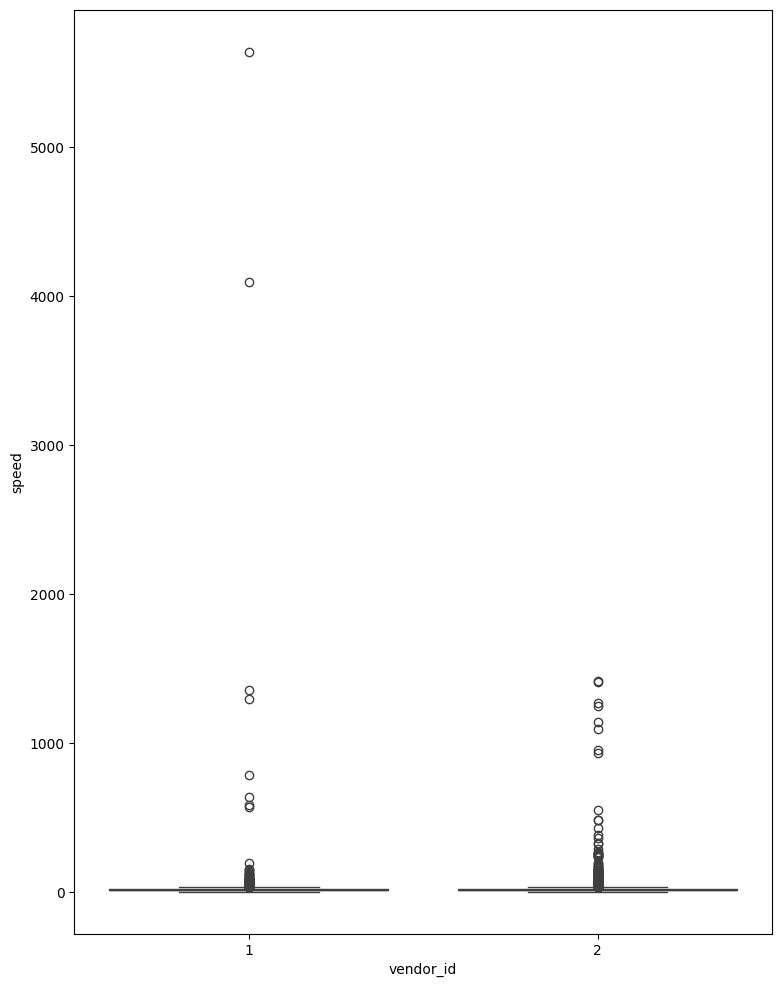

In [ ]:
plt.figure(figsize=(9,12))
sns.boxplot(data=zone, x='vendor_id', y='speed')

In [ ]:
zone.groupby(['vendor_id']).agg(avg_speed=('speed', 'mean')).reset_index()

,vendor_id,avg_speed
0,1,14.406880
1,2,14.439434


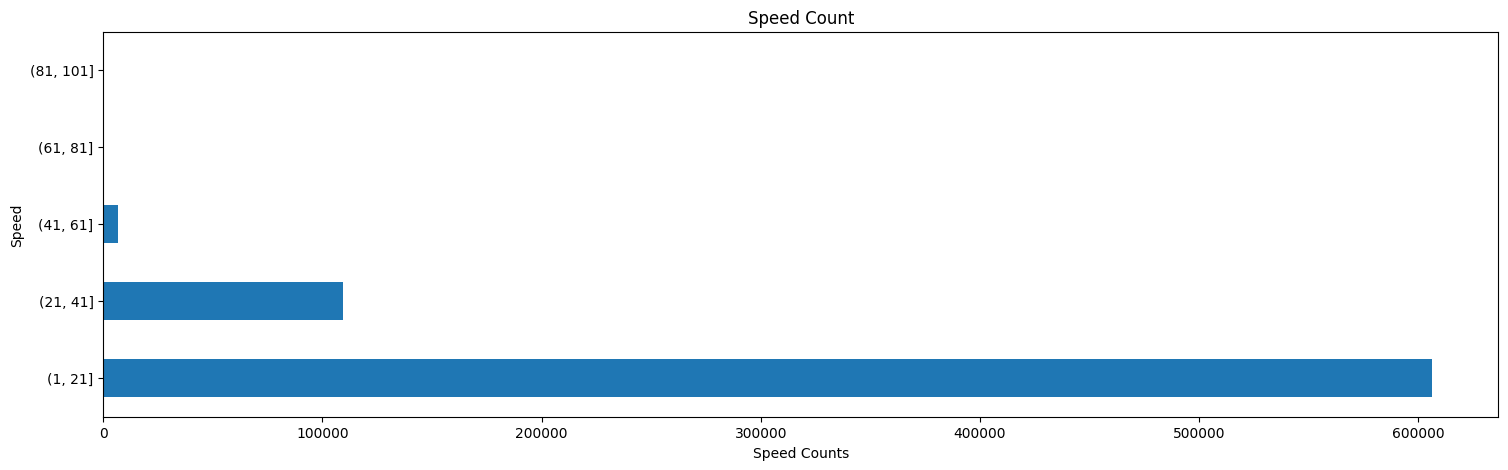

In [ ]:
zone.speed.groupby(pd.cut(zone.speed, np.arange(1,121,20))).count().plot(kind='barh',figsize = (18,5))
plt.title('Speed Count')
plt.xlabel('Speed Counts')
plt.ylabel('Speed')
plt.show()

In [11]:
df = zone[(zone['trip_duration'] >= 330) & (zone['trip_duration'] <= 7200)]

Text(0.5, 0, 'Trip Duration')

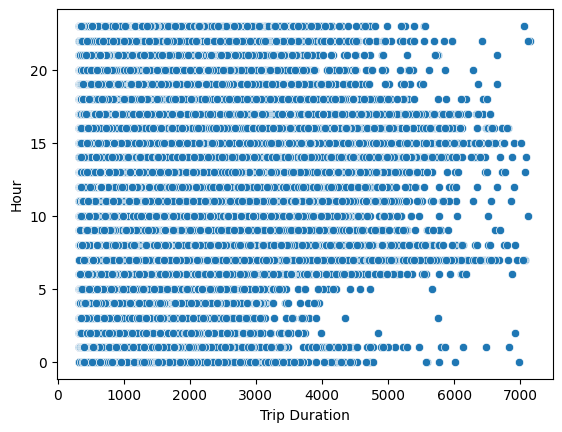

In [15]:
sns.scatterplot(data=df, y='pickup_hour', x='trip_duration')
plt.ylabel('Hour')
plt.xlabel('Trip Duration')

In [ ]:
zone.to_csv('nyc_taxi_modelling.csv', sep=',')

In [ ]:
from google.colab import files
files.download('nyc_taxi_modelling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>